In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../core/tensors/games/2015.csv', header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,531,532,533,534,535,536,537,538,539,540
0,0.446721,0.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.136311,0.008721,0.140351,0.089219,0.101562,0.164557,1.0,0.164568,0.116185,1.0
1,0.467213,0.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.212168,0.007267,0.098246,0.070632,0.085938,0.065823,1.0,0.160971,0.084971,1.0
2,0.409836,0.30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.298806,0.015988,0.049123,0.237918,0.414062,0.225316,1.0,0.167266,0.124277,1.0
3,0.487705,0.45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.185214,0.021802,0.129825,0.052045,0.250000,0.096203,1.0,0.178058,0.150867,0.0
4,0.508197,0.55,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.112437,0.011628,0.056140,0.070632,0.085938,0.091139,1.0,0.163669,0.076879,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,0.500000,0.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.001155,0.000000,0.000000,0.007435,0.000000,0.000000,1.0,0.103417,0.049711,0.0
2424,0.508197,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.041201,0.000000,0.000000,0.085502,0.000000,0.020253,1.0,0.114209,0.062428,1.0
2425,0.385246,0.40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.006931,0.000000,0.000000,0.022305,0.000000,0.000000,1.0,0.107014,0.051445,1.0
2426,0.487705,0.30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.033115,0.000000,0.000000,0.115242,0.000000,0.002532,1.0,0.064748,0.046243,1.0


In [4]:
game0 = list(df.iloc[0])

In [5]:
len(game0)

541

In [6]:
y0 = int(game0[-1])

In [7]:
y0

1

In [8]:
type(game0)

list

In [9]:
game0 = game0[:-1]

In [10]:
game0 = np.reshape(game0, (18, 30, 1))

In [11]:
game0.shape

(18, 30, 1)

In [12]:
game1 = list(df.iloc[1])

In [13]:
y1 = int(game1[-1])

In [14]:
game1 = game1[:-1]

In [15]:
game1 = np.reshape(game1, (18, 30, 1))

In [16]:
games = [game0, game1]

In [17]:
rows = len(games)
cols = len(games[0])
fors = len(games[0][0])
last = len(games[0][0][0])

In [18]:
(rows, cols, fors, last)

(2, 18, 30, 1)

In [19]:
game2 = list(df.iloc[2])
y2 = int(game2[-1])
game2 = game2[:-1]
game2 = np.reshape(game2, (18, 30))

In [20]:
games.append(game2)

In [21]:
rows = len(games)
cols = len(games[0])
fors = len(games[0][0])
(rows, cols, fors)

(3, 18, 30)

<p>We've shown that this is an effective method of getting games as 3D tables from the .csv files, as well as combining them into a list of tables. We can scale this to get a list of every game, and this will be our CNN input.</p>

In [22]:
df.shape

(2428, 541)

In [23]:
X = []
y = []
for index in range(0, df.shape[0]):
    game = list(df.iloc[index])
    y_sample = int(game[-1])
    game = game[:-1]
    game = np.reshape(game, ([18, 30, 1]))
    X.append(game)
    y.append(y_sample)
X = np.array(X)
y = np.array(y)

In [24]:
y = y[..., np.newaxis]

In [25]:
X.shape

(2428, 18, 30, 1)

In [26]:
y.shape

(2428, 1)

In [27]:
rows = len(games)
cols = len(games[0])
fors = len(games[0][0])
last = len(games[0][0][0])
(rows, cols, fors, last)

(3, 18, 30, 1)

In [28]:
len(y)

2428

In [29]:
input_shape = (18, 30, 1)

<p>Now we can extrapolate this to pull all games from all years into one list. This will be the last step before running our predictive model.</p>

In [3]:
X = []
y = []
for year in range(1919, 2020):
    df = pd.read_csv('../core/tensors/games/{}.csv'.format(year), header=None)
    for index in range(0, df.shape[0]):
        game = list(df.iloc[index])
        y_sample = int(game[-1])
        game = game[:-1]
        game = np.reshape(game, ([18, 30, 1]))
        X.append(game)
        y.append(y_sample)

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
y = y[..., np.newaxis]

In [6]:
rows = len(X)
cols = len(X[0])
fors = len(X[0][0])
last = len(X[0][0][0])
(rows, cols, fors, last)

(176687, 18, 30, 1)

In [7]:
len(y)

176687

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
len(X_train)

141349

In [11]:
X_train.shape

(141349, 18, 30, 1)

In [12]:
len(X_test)

35338

In [13]:
len(y_train)

141349

In [14]:
y_train.shape

(141349, 1)

In [15]:
len(y_test)

35338

In [16]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

<h1>Building the CNN</h1>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [18]:
image_shape=(18, 30, 1)

In [19]:
epochs = 4000
batch_size = 16
loss_param = 'binary_crossentropy'
optimizer_param = 'adam'
stop_monitor = 'val_loss'
metric = 'accuracy'
stop_patience = 20

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(1, 1),
                 input_shape=image_shape, activation='tanh'))
model.add(MaxPool2D(pool_size=(1, 1)))

model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 input_shape=image_shape, activation='tanh'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3),
                 activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss=loss_param, optimizer=optimizer_param,
             metrics=[metric])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 18, 30, 32)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 9, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 9, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 4, 64)         

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor=stop_monitor, patience=stop_patience)

In [26]:
results = model.fit(X_train, y_train, epochs=epochs,
                             validation_data=(X_test, y_test),
                             callbacks=[early_stop]
                   )

Train on 141349 samples, validate on 35338 samples
Epoch 1/4000
141349/141349 [==============================] - 185s 1ms/sample - loss: 0.6859 - accuracy: 0.5502 - val_loss: 0.6816 - val_accuracy: 0.5618
Epoch 2/4000
141349/141349 [==============================] - 169s 1ms/sample - loss: 0.6838 - accuracy: 0.5559 - val_loss: 0.6860 - val_accuracy: 0.5537
Epoch 3/4000
141349/141349 [==============================] - 170s 1ms/sample - loss: 0.6834 - accuracy: 0.5575 - val_loss: 0.6815 - val_accuracy: 0.5571
Epoch 4/4000
141349/141349 [==============================] - 169s 1ms/sample - loss: 0.6835 - accuracy: 0.5562 - val_loss: 0.6847 - val_accuracy: 0.5595
Epoch 5/4000
141349/141349 [==============================] - 185s 1ms/sample - loss: 0.6831 - accuracy: 0.5580 - val_loss: 0.6816 - val_accuracy: 0.5614
Epoch 6/4000
141349/141349 [==============================] - 202s 1ms/sample - loss: 0.6831 - accuracy: 0.5584 - val_loss: 0.6826 - val_accuracy: 0.5599
Epoch 7/4000
141349/14134

In [27]:
losses = model.history.history
losses['loss'] = np.asarray(losses['loss'])
losses['val_loss'] = np.asarray(losses['val_loss'])
final_number_of_epochs = len(losses['loss'])
min_loss = losses['loss'].min()
mean_loss = losses['loss'].mean()
final_loss = losses['loss'][-1]
min_val_loss = losses['val_loss'].min()
mean_val_loss = losses['val_loss'].mean()
final_val_loss = losses['val_loss'][-1]

def get_model_summary():
    output = []
    model.summary(print_fn=lambda line: output.append(line))
    return str(output).strip('[]')


summary = get_model_summary()

record = {
    'Epochs': final_number_of_epochs,
    'Batch_Size': batch_size,
    'Loss_Func': loss_param,
    'Optimizer': optimizer_param,
    'Early_Stop_Monitor': stop_monitor,
    'Early_Stop_Patience': stop_patience,
    'Min_Loss': min_loss,
    'Mean_Loss': mean_loss,
    'Final_Loss': final_loss,
    'Min_Val_Loss': min_val_loss,
    'Mean_Val_Loss': mean_val_loss,
    'Final_Val_Loss': final_val_loss,
    'Model': summary
}

new_data = pd.DataFrame(record, index=[0])

if os.path.exists('../core/records/game_predictions.csv'):
    df_records = pd.read_csv('../core/records/game_predictions.csv')
    df_records = df_records.append(new_data)
else:
    df_records = pd.DataFrame(new_data)

df_records.to_csv('../core/records/game_predictions.csv',
                  index=False, float_format='%g')


model.save('../core/models/model_games.h5')

<h2>Model Evaluation</h2>

In [28]:
losses = pd.DataFrame(model.history.history)

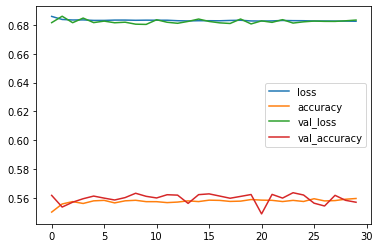

In [29]:
losses.plot()